# Feature Engineering / Vectorización
## Dataset: YouToxic English 1000 - Preprocesado

Este notebook contiene la vectorización del texto preprocesado usando TF-IDF y Count Vectorizer para preparar los datos para el modelado de Machine Learning.


## 1. Importación de librerías

Importamos las librerías necesarias para la vectorización y división de datos.


In [1]:
# Librerías para manipulación de datos
import pandas as pd
import numpy as np

# Librerías para vectorización
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Librerías para división de datos
from sklearn.model_selection import train_test_split

# Librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline


## 2. Carga de datos preprocesados

Cargamos el dataset que ya fue preprocesado en el notebook anterior.


In [2]:
# Cargar datos preprocesados
df = pd.read_csv('../data/processed/youtoxic_english_1000_processed.csv')

print(f"Dataset cargado: {df.shape[0]} filas, {df.shape[1]} columnas")
print(f"\nColumnas disponibles:")
print(df.columns.tolist())
print(f"\nPrimeras filas:")
df.head()


Dataset cargado: 1000 filas, 16 columnas

Columnas disponibles:
['CommentId', 'VideoId', 'Text', 'IsToxic', 'IsAbusive', 'IsThreat', 'IsProvocative', 'IsObscene', 'IsHatespeech', 'IsRacist', 'IsNationalist', 'IsSexist', 'IsHomophobic', 'IsReligiousHate', 'IsRadicalism', 'Text_processed']

Primeras filas:


,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism,Text_processed
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,"If only people would just take a step back and not make this case about them, because it wasn't ...",False,False,False,False,False,False,False,False,False,False,False,False,people would take step back make case be not anyone except two people situation lump mess take m...
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to apprehend. They are trained to shoot to kill. And I...,True,True,False,False,False,False,False,False,False,False,False,False,law enforcement train shoot apprehend train shoot kill thank wilson kill punk bitch
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' banners being held by white cunts is kinda patroniz...,True,True,False,False,True,False,False,False,False,False,False,False,do not reckon black life matter banner hold white cunt kinda patronize ironically racist could c...
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do not like police officers. They are called Crimina...,False,False,False,False,False,False,False,False,False,False,False,False,large number people like police officer call criminal reason police officer fact criminal like p...
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should have not been shot 6 extra time. Shoot him once if ...",False,False,False,False,False,False,False,False,False,False,False,False,arab dude absolutely right shot extra time shoot he s attack would stop attack shoot twice he s ...


In [3]:
# Verificar que tenemos la columna de texto preprocesado
if 'Text_processed' in df.columns:
    print("✅ Columna 'Text_processed' encontrada")
    print(f"\nEjemplo de texto preprocesado:")
    print(df['Text_processed'].iloc[0])
else:
    print("⚠️  Columna 'Text_processed' no encontrada. Usando 'Text' original.")
    df['Text_processed'] = df['Text']


✅ Columna 'Text_processed' encontrada

Ejemplo de texto preprocesado:
people would take step back make case be not anyone except two people situation lump mess take matter hand make kind protest selfish without rational thought investigation guy video heavily emotional hyped want hear get hear press never reasonable discussion kudo smerconish keeping level whole time let masri make fool dare tear city protest make dishonor entire incident hate way since police brutality become epidemic wish everyone would stop pretend like know exactly go there s measurable amount people honestly witness incident none we clue way whole issue swing grand jury inform trust majority rule right course action let also thank police officer america actually serve protect even you re bit jerk pull respect job know someone many people go pout hold accountable action people hate police need officer two around emergency


## 3. Preparación de variables

Separamos las características (X) y la variable objetivo (y).


In [4]:
# Variable objetivo: IsToxic (clasificación binaria)
y = df['IsToxic'].astype(int)  # Convertir boolean a int (0 o 1)

# Texto preprocesado para vectorizar
X_text = df['Text_processed'].fillna('')  # Asegurar que no hay NaN

print(f"Forma de X_text: {X_text.shape}")
print(f"Forma de y: {y.shape}")
print(f"\nDistribución de la variable objetivo:")
print(y.value_counts())
print(f"\nPorcentajes:")
print(y.value_counts(normalize=True) * 100)


Forma de X_text: (1000,)
Forma de y: (1000,)

Distribución de la variable objetivo:
IsToxic
0    538
1    462
Name: count, dtype: int64

Porcentajes:
IsToxic
0    53.8
1    46.2
Name: proportion, dtype: float64


## 4. División de datos: Train y Test

Dividimos los datos en conjuntos de entrenamiento y prueba antes de vectorizar.


In [5]:
# División train/test (80% train, 20% test)
# Usamos stratify para mantener la proporción de clases
X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_text, 
    y, 
    test_size=0.2, 
    random_state=42,
    stratify=y  # Mantiene la proporción de clases
)

print(f"Tamaño del conjunto de entrenamiento: {len(X_train_text)} ({len(X_train_text)/len(X_text)*100:.1f}%)")
print(f"Tamaño del conjunto de prueba: {len(X_test_text)} ({len(X_test_text)/len(X_text)*100:.1f}%)")
print(f"\nDistribución en train:")
print(y_train.value_counts())
print(f"\nDistribución en test:")
print(y_test.value_counts())


Tamaño del conjunto de entrenamiento: 800 (80.0%)
Tamaño del conjunto de prueba: 200 (20.0%)

Distribución en train:
IsToxic
0    430
1    370
Name: count, dtype: int64

Distribución en test:
IsToxic
0    108
1     92
Name: count, dtype: int64


## 5. Vectorización con TF-IDF

TF-IDF (Term Frequency-Inverse Document Frequency) mide la importancia de cada palabra en cada documento, penalizando palabras muy comunes.


In [6]:
# Configuración de TF-IDF
# max_features: número máximo de palabras más importantes a considerar
# ngram_range: usar unigramas (1,1) o bigramas (1,2) o ambos
# min_df: ignorar palabras que aparecen en menos de X documentos
# max_df: ignorar palabras que aparecen en más del X% de documentos

tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,      # Top 5000 palabras más importantes
    ngram_range=(1, 2),     # Unigramas y bigramas
    min_df=2,               # Palabra debe aparecer en al menos 2 documentos
    max_df=0.95,            # Ignorar palabras en más del 95% de documentos
    stop_words='english'    # Eliminar stopwords (aunque ya están eliminadas)
)

print("Aplicando TF-IDF al conjunto de entrenamiento...")
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_text)

print("Aplicando TF-IDF al conjunto de prueba...")
X_test_tfidf = tfidf_vectorizer.transform(X_test_text)

print(f"\n✅ Vectorización TF-IDF completada")
print(f"Forma de X_train_tfidf: {X_train_tfidf.shape}")
print(f"Forma de X_test_tfidf: {X_test_tfidf.shape}")
print(f"Número de características (palabras): {X_train_tfidf.shape[1]}")


Aplicando TF-IDF al conjunto de entrenamiento...
Aplicando TF-IDF al conjunto de prueba...

✅ Vectorización TF-IDF completada
Forma de X_train_tfidf: (800, 1767)
Forma de X_test_tfidf: (200, 1767)
Número de características (palabras): 1767


In [7]:
# Ver algunas características (palabras) más importantes
feature_names_tfidf = tfidf_vectorizer.get_feature_names_out()
print("Primeras 20 características (palabras) de TF-IDF:")
print(feature_names_tfidf[:20])
print(f"\nÚltimas 20 características:")
print(feature_names_tfidf[-20:])


Primeras 20 características (palabras) de TF-IDF:
['able' 'absolutely' 'abuse' 'accord' 'account' 'accountable'
 'accountable action' 'act' 'act like' 'action' 'action let' 'activity'
 'actual' 'actually' 'add' 'addition' 'address' 'admit' 'adult' 'advance']

Últimas 20 características:
['wrong' 'wtf' 'ya' 'yea' 'yeah' 'year' 'year ago' 'year old'
 'year service' 'yell' 'yes' 'yo' 'young' 'young girl' 'young man'
 'young white' 'youtube' 'youtube video' 'zimmerman' 'zimmerman case']


## 6. Vectorización con Count Vectorizer (Bag of Words)

Count Vectorizer cuenta simplemente cuántas veces aparece cada palabra en cada documento.


In [8]:
# Configuración de Count Vectorizer (mismas opciones que TF-IDF para comparar)
count_vectorizer = CountVectorizer(
    max_features=5000,      # Top 5000 palabras más frecuentes
    ngram_range=(1, 2),     # Unigramas y bigramas
    min_df=2,               # Palabra debe aparecer en al menos 2 documentos
    max_df=0.95,            # Ignorar palabras en más del 95% de documentos
    stop_words='english'    # Eliminar stopwords
)

print("Aplicando Count Vectorizer al conjunto de entrenamiento...")
X_train_count = count_vectorizer.fit_transform(X_train_text)

print("Aplicando Count Vectorizer al conjunto de prueba...")
X_test_count = count_vectorizer.transform(X_test_text)

print(f"\n✅ Vectorización Count Vectorizer completada")
print(f"Forma de X_train_count: {X_train_count.shape}")
print(f"Forma de X_test_count: {X_test_count.shape}")
print(f"Número de características (palabras): {X_train_count.shape[1]}")


Aplicando Count Vectorizer al conjunto de entrenamiento...
Aplicando Count Vectorizer al conjunto de prueba...

✅ Vectorización Count Vectorizer completada
Forma de X_train_count: (800, 1767)
Forma de X_test_count: (200, 1767)
Número de características (palabras): 1767


In [9]:
# Ver algunas características más importantes
feature_names_count = count_vectorizer.get_feature_names_out()
print("Primeras 20 características (palabras) de Count Vectorizer:")
print(feature_names_count[:20])
print(f"\nÚltimas 20 características:")
print(feature_names_count[-20:])


Primeras 20 características (palabras) de Count Vectorizer:
['able' 'absolutely' 'abuse' 'accord' 'account' 'accountable'
 'accountable action' 'act' 'act like' 'action' 'action let' 'activity'
 'actual' 'actually' 'add' 'addition' 'address' 'admit' 'adult' 'advance']

Últimas 20 características:
['wrong' 'wtf' 'ya' 'yea' 'yeah' 'year' 'year ago' 'year old'
 'year service' 'yell' 'yes' 'yo' 'young' 'young girl' 'young man'
 'young white' 'youtube' 'youtube video' 'zimmerman' 'zimmerman case']


In [10]:
# Comparación de densidad de matrices (sparsity)
print("="*60)
print("COMPARACIÓN DE MÉTODOS DE VECTORIZACIÓN")
print("="*60)

print(f"\n1. TF-IDF:")
print(f"   - Forma: {X_train_tfidf.shape}")
print(f"   - Tipo: {type(X_train_tfidf)}")
print(f"   - Densidad: {(1 - (X_train_tfidf.nnz / (X_train_tfidf.shape[0] * X_train_tfidf.shape[1]))) * 100:.2f}% de ceros")
print(f"   - Valores no cero: {X_train_tfidf.nnz}")

print(f"\n2. Count Vectorizer:")
print(f"   - Forma: {X_train_count.shape}")
print(f"   - Tipo: {type(X_train_count)}")
print(f"   - Densidad: {(1 - (X_train_count.nnz / (X_train_count.shape[0] * X_train_count.shape[1]))) * 100:.2f}% de ceros")
print(f"   - Valores no cero: {X_train_count.nnz}")

print(f"\n3. Diferencias:")
print(f"   - Mismo número de características: {X_train_tfidf.shape[1] == X_train_count.shape[1]}")
print(f"   - TF-IDF penaliza palabras comunes (da más peso a palabras únicas)")
print(f"   - Count Vectorizer solo cuenta frecuencias (todas las palabras tienen el mismo peso)")


COMPARACIÓN DE MÉTODOS DE VECTORIZACIÓN

1. TF-IDF:
   - Forma: (800, 1767)
   - Tipo: <class 'scipy.sparse._csr.csr_matrix'>
   - Densidad: 99.28% de ceros
   - Valores no cero: 10146

2. Count Vectorizer:
   - Forma: (800, 1767)
   - Tipo: <class 'scipy.sparse._csr.csr_matrix'>
   - Densidad: 99.28% de ceros
   - Valores no cero: 10146

3. Diferencias:
   - Mismo número de características: True
   - TF-IDF penaliza palabras comunes (da más peso a palabras únicas)
   - Count Vectorizer solo cuenta frecuencias (todas las palabras tienen el mismo peso)


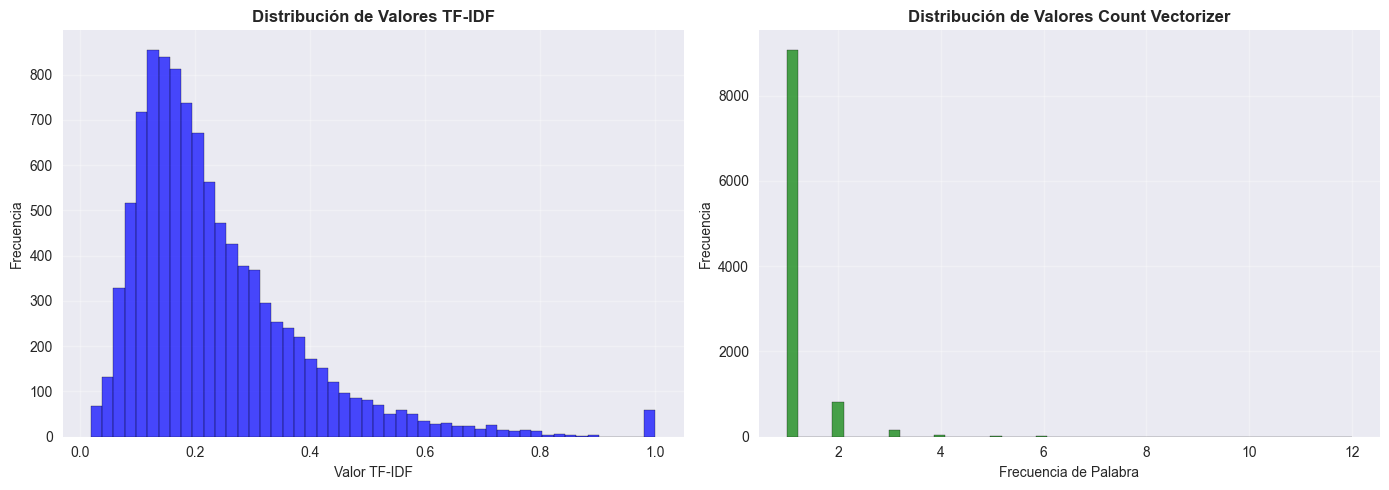


Estadísticas TF-IDF:
   - Media: 0.2363
   - Mediana: 0.1977
   - Máximo: 1.0000

Estadísticas Count Vectorizer:
   - Media: 1.15
   - Mediana: 1.00
   - Máximo: 12


In [11]:
# Visualización: Comparación de valores promedio
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# TF-IDF: distribución de valores
tfidf_values = X_train_tfidf.data
axes[0].hist(tfidf_values, bins=50, alpha=0.7, color='blue', edgecolor='black')
axes[0].set_title('Distribución de Valores TF-IDF', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Valor TF-IDF', fontsize=10)
axes[0].set_ylabel('Frecuencia', fontsize=10)
axes[0].grid(alpha=0.3)

# Count Vectorizer: distribución de valores
count_values = X_train_count.data
axes[1].hist(count_values, bins=50, alpha=0.7, color='green', edgecolor='black')
axes[1].set_title('Distribución de Valores Count Vectorizer', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Frecuencia de Palabra', fontsize=10)
axes[1].set_ylabel('Frecuencia', fontsize=10)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nEstadísticas TF-IDF:")
print(f"   - Media: {tfidf_values.mean():.4f}")
print(f"   - Mediana: {np.median(tfidf_values):.4f}")
print(f"   - Máximo: {tfidf_values.max():.4f}")
print(f"\nEstadísticas Count Vectorizer:")
print(f"   - Media: {count_values.mean():.2f}")
print(f"   - Mediana: {np.median(count_values):.2f}")
print(f"   - Máximo: {count_values.max()}")


## 8. Guardar matrices vectorizadas

Guardamos las matrices vectorizadas y los vectorizadores para usarlos en el modelado.


In [12]:
# Importar librerías para guardar
import pickle
import os

# Crear directorio para guardar modelos y datos procesados
os.makedirs('../data/processed', exist_ok=True)
os.makedirs('../models', exist_ok=True)

# Guardar matrices TF-IDF
print("Guardando matrices TF-IDF...")
with open('../data/processed/X_train_tfidf.pkl', 'wb') as f:
    pickle.dump(X_train_tfidf, f)
with open('../data/processed/X_test_tfidf.pkl', 'wb') as f:
    pickle.dump(X_test_tfidf, f)

# Guardar matrices Count Vectorizer
print("Guardando matrices Count Vectorizer...")
with open('../data/processed/X_train_count.pkl', 'wb') as f:
    pickle.dump(X_train_count, f)
with open('../data/processed/X_test_count.pkl', 'wb') as f:
    pickle.dump(X_test_count, f)

# Guardar vectorizadores
print("Guardando vectorizadores...")
with open('../models/tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)
with open('../models/count_vectorizer.pkl', 'wb') as f:
    pickle.dump(count_vectorizer, f)

# Guardar variables objetivo
print("Guardando variables objetivo...")
with open('../data/processed/y_train.pkl', 'wb') as f:
    pickle.dump(y_train, f)
with open('../data/processed/y_test.pkl', 'wb') as f:
    pickle.dump(y_test, f)

print("\n✅ Todos los archivos guardados correctamente")


Guardando matrices TF-IDF...
Guardando matrices Count Vectorizer...
Guardando vectorizadores...
Guardando variables objetivo...

✅ Todos los archivos guardados correctamente


## 9. Resumen del Feature Engineering

Resumen de lo que hemos creado y preparado para el modelado.


In [13]:
print("="*80)
print("RESUMEN DEL FEATURE ENGINEERING")
print("="*80)

print(f"\n1. DATOS:")
print(f"   - Total de comentarios: {len(X_text)}")
print(f"   - Comentarios de entrenamiento: {len(X_train_text)} ({len(X_train_text)/len(X_text)*100:.1f}%)")
print(f"   - Comentarios de prueba: {len(X_test_text)} ({len(X_test_text)/len(X_text)*100:.1f}%)")

print(f"\n2. VECTORIZACIÓN TF-IDF:")
print(f"   - Características (palabras): {X_train_tfidf.shape[1]}")
print(f"   - Matriz de entrenamiento: {X_train_tfidf.shape}")
print(f"   - Matriz de prueba: {X_test_tfidf.shape}")
print(f"   - Tipo: Matriz dispersa (sparse matrix)")

print(f"\n3. VECTORIZACIÓN COUNT VECTORIZER:")
print(f"   - Características (palabras): {X_train_count.shape[1]}")
print(f"   - Matriz de entrenamiento: {X_train_count.shape}")
print(f"   - Matriz de prueba: {X_test_count.shape}")
print(f"   - Tipo: Matriz dispersa (sparse matrix)")

print(f"\n4. ARCHIVOS GUARDADOS:")
print(f"   ✅ X_train_tfidf.pkl - Matriz TF-IDF de entrenamiento")
print(f"   ✅ X_test_tfidf.pkl - Matriz TF-IDF de prueba")
print(f"   ✅ X_train_count.pkl - Matriz Count Vectorizer de entrenamiento")
print(f"   ✅ X_test_count.pkl - Matriz Count Vectorizer de prueba")
print(f"   ✅ tfidf_vectorizer.pkl - Vectorizador TF-IDF entrenado")
print(f"   ✅ count_vectorizer.pkl - Vectorizador Count Vectorizer entrenado")
print(f"   ✅ y_train.pkl - Etiquetas de entrenamiento")
print(f"   ✅ y_test.pkl - Etiquetas de prueba")

print(f"\n5. PRÓXIMOS PASOS:")
print(f"   - Probar ambos métodos de vectorización con diferentes modelos")
print(f"   - Comparar rendimiento: TF-IDF vs Count Vectorizer")
print(f"   - Seleccionar el mejor método para el modelado final")

print("\n" + "="*80)


RESUMEN DEL FEATURE ENGINEERING

1. DATOS:
   - Total de comentarios: 1000
   - Comentarios de entrenamiento: 800 (80.0%)
   - Comentarios de prueba: 200 (20.0%)

2. VECTORIZACIÓN TF-IDF:
   - Características (palabras): 1767
   - Matriz de entrenamiento: (800, 1767)
   - Matriz de prueba: (200, 1767)
   - Tipo: Matriz dispersa (sparse matrix)

3. VECTORIZACIÓN COUNT VECTORIZER:
   - Características (palabras): 1767
   - Matriz de entrenamiento: (800, 1767)
   - Matriz de prueba: (200, 1767)
   - Tipo: Matriz dispersa (sparse matrix)

4. ARCHIVOS GUARDADOS:
   ✅ X_train_tfidf.pkl - Matriz TF-IDF de entrenamiento
   ✅ X_test_tfidf.pkl - Matriz TF-IDF de prueba
   ✅ X_train_count.pkl - Matriz Count Vectorizer de entrenamiento
   ✅ X_test_count.pkl - Matriz Count Vectorizer de prueba
   ✅ tfidf_vectorizer.pkl - Vectorizador TF-IDF entrenado
   ✅ count_vectorizer.pkl - Vectorizador Count Vectorizer entrenado
   ✅ y_train.pkl - Etiquetas de entrenamiento
   ✅ y_test.pkl - Etiquetas de prueb

## 7. Comparación de métodos de vectorización

Vamos a comparar las características de ambos métodos.
